In [1]:
#initialisation
import networkx as nx
import copy

In [2]:
#definitions
#gives adjacency dictionary
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# gives the parent of the value in a nested dictionary
def find_key(d, value):
    start_list =[]
    for i in value:
        # print("i is", i)
        for k,v in d.items():
            # print("k and v is", k,v)
            if v['name'] == i:
                # print("k is", k)
                start_list.append(i)
    return start_list

#gives the value of type key of a node
def retrieve_type(list):
    type_list = []
    for i in list:
        # print ("i is", i)
        type = nodes[i]['type']
        # print(tag)
        type_list.append(type)
    return (type_list)

In [3]:
#nodes and edges data
nodes = {
    0: {"name":0,"type":None,"use_frequency":"D", "units":None,"tag":0, "floor":0},
    1: {"name":1,"type":None,"use_frequency":"D", "units":None,"tag":0, "floor":0},
    2: {"name":2,"type":"S","use_frequency":"D", "units":"2","tag":"Eren", "floor":0},
    3: {"name":3,"type":"W","use_frequency":"D", "units":"2","tag":"Eren", "floor":1},
    4: {"name":4,"type":"S","use_frequency":"D", "units":"3","tag":"Felipe", "floor":1},
    5: {"name":5,"type":"S","use_frequency":"D", "units":"3","tag":1, "floor":1}
}
#print (nodes[4]['name'])

# edges = (("A","B"),("B","C"),("C","D"),("D","A"))
# print(edges)

edges= ((nodes[0]['name'],nodes[1]['name']),(nodes[0]['name'],nodes[2]['name']),(nodes[0]['name'],nodes[3]['name']),(nodes[0]['name'],nodes[4]['name']),(nodes[1]['name'],nodes[4]['name']),(nodes[1]['name'],nodes[2]['name']))

print (edges)

((0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 2))


{0: [1, 2, 3, 4], 1: [0, 4, 2], 2: [0, 1], 3: [0], 4: [0, 1]}


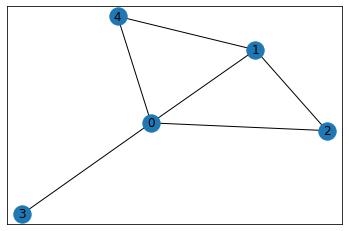

In [4]:
#draw the graph
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos)

#get adjacency dictionary
edge_dict = create_edge_dict(G)
print(edge_dict)

In [5]:
#find the local street nodes that have 2 shops next to it
covered_street = []
for k in range(len(nodes)):
    if (nodes[k]["tag"] == 0) and (nodes[k]["use_frequency"]=="D"):
       covered_street.append(k) 
print(covered_street)
print(edge_dict)

[0, 1]
{0: [1, 2, 3, 4], 1: [0, 4, 2], 2: [0, 1], 3: [0], 4: [0, 1]}


In [6]:
# form a dictionary of the street nodes that have connection to shops and 
# the nodes they are connected to
edge_dict_copy=edge_dict.copy()
x=[]
for k in covered_street:
    # print("k is",k)
    for i in edge_dict_copy:
        # print("i is",i)
        # print("k is",k)
        if k==i:
            x.append(i)

street_dict={}
for k in edge_dict_copy:
    # print(k)
    # print(dict_1)
    # print(y)
    for i in x:
        # print(i)
        if k==i:
            street_dict[k]=edge_dict_copy[k]
            # print("xxx")
print(street_dict)

{0: [1, 2, 3, 4], 1: [0, 4, 2]}


In [7]:
# assign module type to the nodes which have shops on the sides
for k in street_dict:
    for i in street_dict[k]:
        # print(i)
        if (nodes[i]["type"]==nodes[(i)]["type"]) and (nodes[i]["type"]=="S"):
            nodes[k]["module"] = 6   
nodes  

{0: {'name': 0,
  'type': None,
  'use_frequency': 'D',
  'units': None,
  'tag': 0,
  'floor': 0,
  'module': 6},
 1: {'name': 1,
  'type': None,
  'use_frequency': 'D',
  'units': None,
  'tag': 0,
  'floor': 0,
  'module': 6},
 2: {'name': 2,
  'type': 'S',
  'use_frequency': 'D',
  'units': '2',
  'tag': 'Eren',
  'floor': 0},
 3: {'name': 3,
  'type': 'W',
  'use_frequency': 'D',
  'units': '2',
  'tag': 'Eren',
  'floor': 1},
 4: {'name': 4,
  'type': 'S',
  'use_frequency': 'D',
  'units': '3',
  'tag': 'Felipe',
  'floor': 1},
 5: {'name': 5,
  'type': 'S',
  'use_frequency': 'D',
  'units': '3',
  'tag': 1,
  'floor': 1}}

In [8]:
# find corner stones = where shop-street-shop starts
for k in street_dict:
    for i in street_dict[k]:
        for n in edge_dict:
            for m in edge_dict[n]:
                if (i == n) and (nodes[m]["type"]=="W"):
                    workshop_shop=[i]    
# print(workshop_shop)

for k in street_dict:
    for i in street_dict[k]:
        for n in workshop_shop:
            if n == i:
                corner_stone=k
print(corner_stone)

1
